# Assignment Week 3 - "Large" Datasets and Data Augmentation

## Task 1

1. Download the ["Fast Food Classification Dataset - V2"](https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset/data) from Kaggle.

2. Unzip and ensure that the dataset in Colab is structured as follows:

```
|
|-- Fast Food Classification V2
|   |-- TFRecords
|   |-- Test
|   |-- Train
|   `-- Valid
|-- sample_data
`-- archive.zip
```

`Fast Food Classification V2` and `archive.zip` should be on the same level as the already existing `sample_data` directory from Colab. You can ignore the `TFRecords` subdirectory in the following tasks.

In [1]:
#!/bin/bash
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/utkarshsaxenadn/fast-food-classification-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  820M    0 81661    0     0   104k      0  2:13:28 --:--:--  2:13:28  104k
  1  820M    1 10.4M    0     0  6347k      0  0:02:12  0:00:01  0:02:11 11.1M
  2  820M    2 23.2M    0     0  8855k      0  0:01:34  0:00:02  0:01:32 12.0M
  4  820M    4 35.8M    0     0  9945k      0  0:01:24  0:00:03  0:01:21 12.1M
  5  820M    5 48.4M    0     0  10.3M      0  0:01:19  0:00:04  0:01:15 12.3M
  7  820M    7 60.6M    0     0  10.6M      0  0:01:17  0:00:05  0:01:12 12.2M
  8  820M    8 73.0M    0     0  10.9M      0  0:01:15  0:00:06  0:01:09 12.5M
 10  820M   10 85.5M    0     0  11.1M      0  0:01:13  0:00:07  0:01:06 12.4M
 11  820M   11 98.2M    0     0  11.3M      0  0:0

In [2]:
!unzip -q archive.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


## Task 2

1. Define the directory paths for training, validation, and test datasets.

2. Apply the provided `delete_invalid_images` function to check and remove any corrupted or invalid images in each of the three dataset directories.

In [3]:
TRAINING_DIR = "Fast Food Classification V2/Train"
VALIDATION_DIR = "Fast Food Classification V2/Valid"
TEST_DIR = "Fast Food Classification V2/Test"

In [4]:
import os
from PIL import Image

# Define the paths to the directories
directories = [
    TRAINING_DIR,
    VALIDATION_DIR,
    TEST_DIR
]

# Define supported image file extensions
supported_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

def delete_invalid_images(directory):
    """Goes through a directory and deletes any invalid or unsupported images."""
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            # Check if the file has a supported extension
            if not any(file.lower().endswith(ext) for ext in supported_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue

            try:
                with Image.open(file_path) as img:
                    img.load()  # Ensure the image content can be read
                    if img.format not in ["JPEG", "PNG", "GIF", "BMP"]:
                        raise IOError("Unsupported image format")
            except (IOError, SyntaxError, AttributeError) as e:
                print(f"Deleting invalid or corrupted image: {file_path}")
                os.remove(file_path)

# Run the function for each directory
for dir_path in directories:
    delete_invalid_images(dir_path)

print("Invalid and unsupported image cleanup completed.")

Invalid and unsupported image cleanup completed.


# Task 3

1. Implement a function that visualizes 3 random examples per class from the training data to get a feel for the dataset.

2. Run the function multiple times to get different images from the dataset.

Tip: You can use whatever Python packages you like. `opencv` and `matplotlib` might be suitable choices.

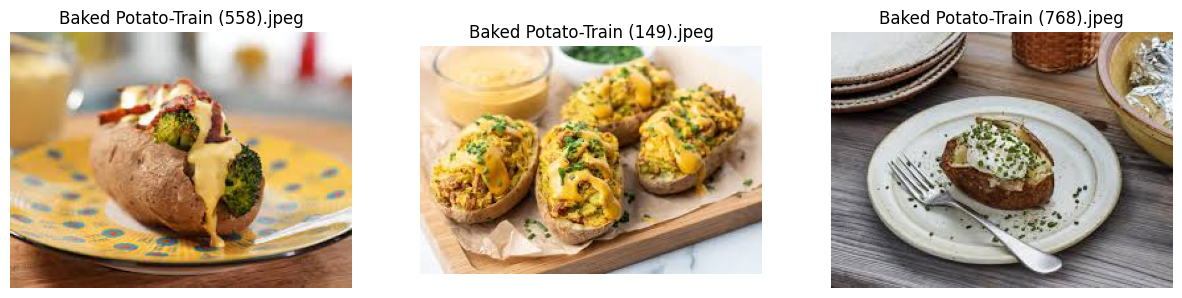

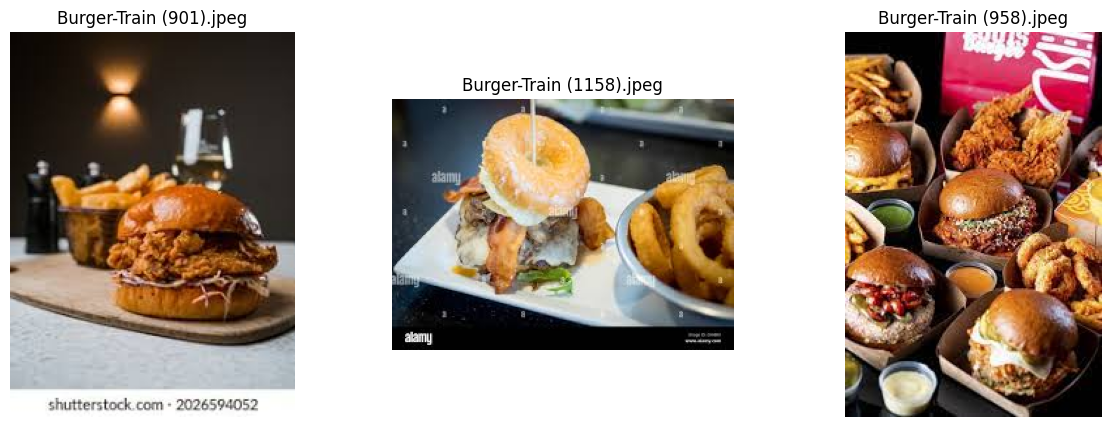

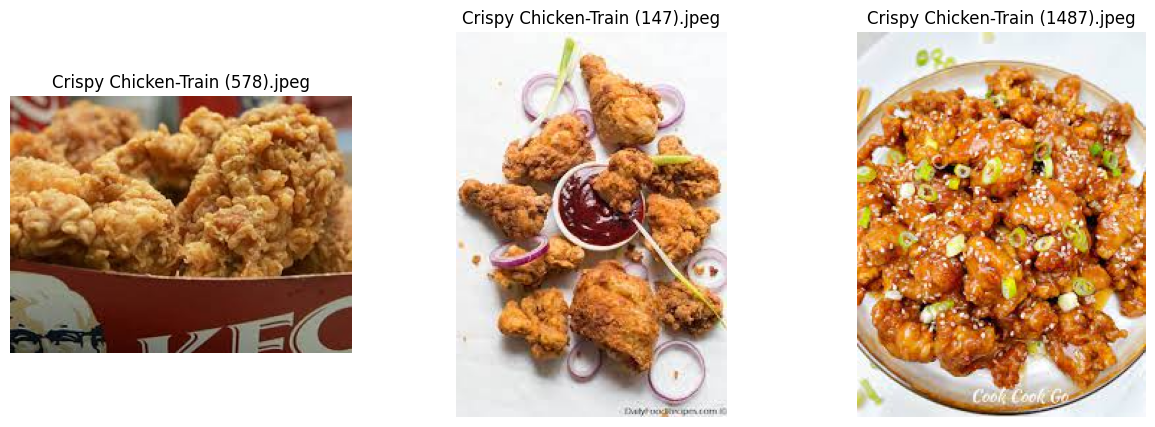

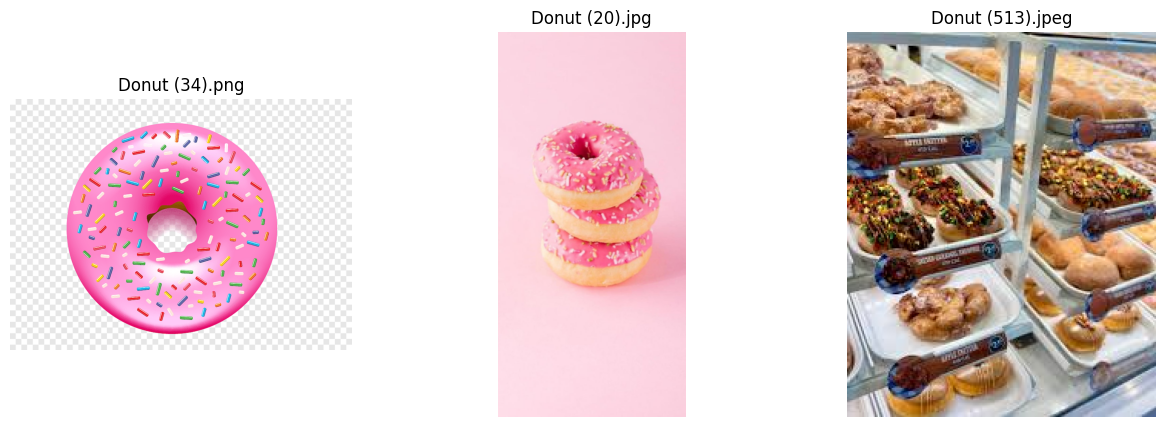

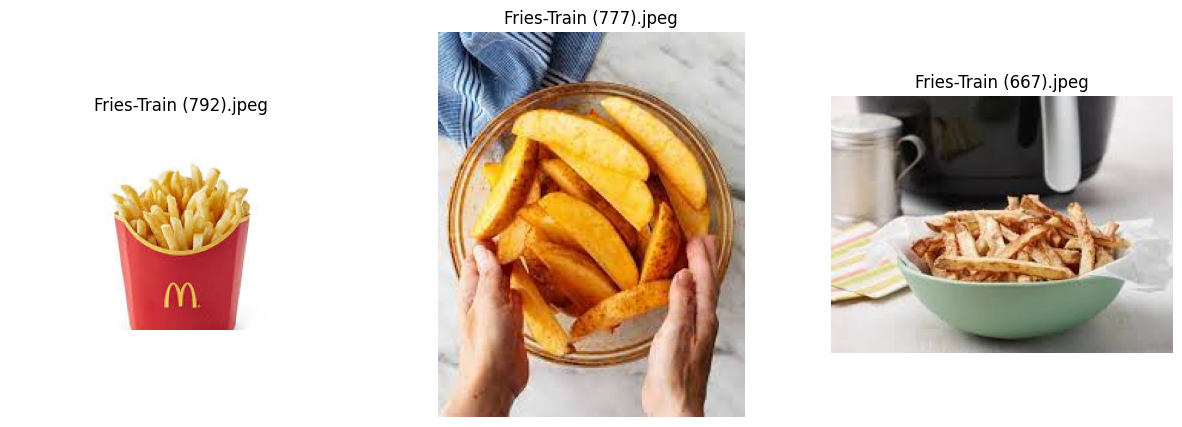

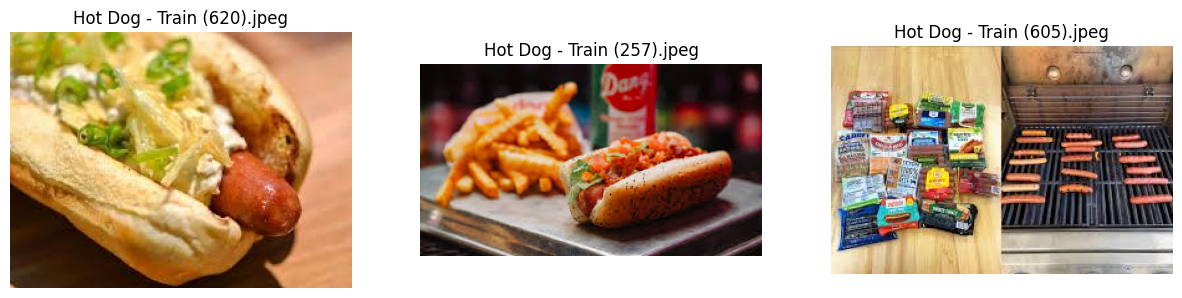

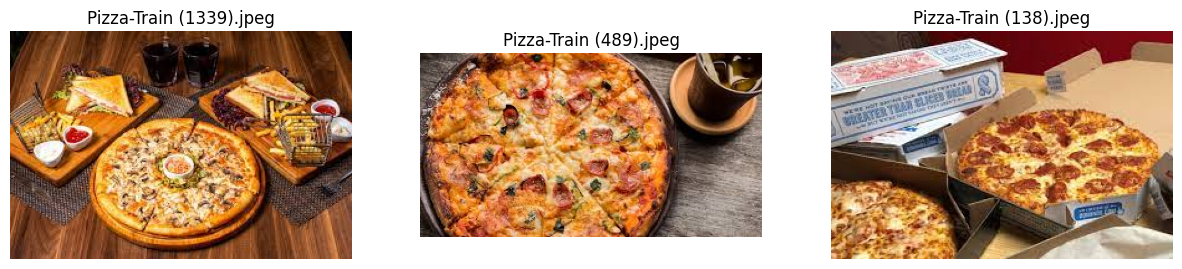

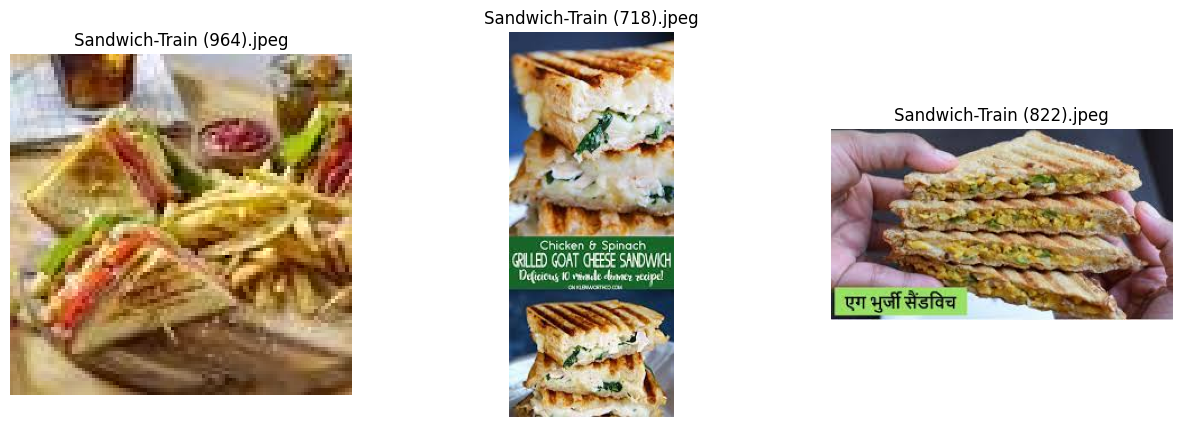

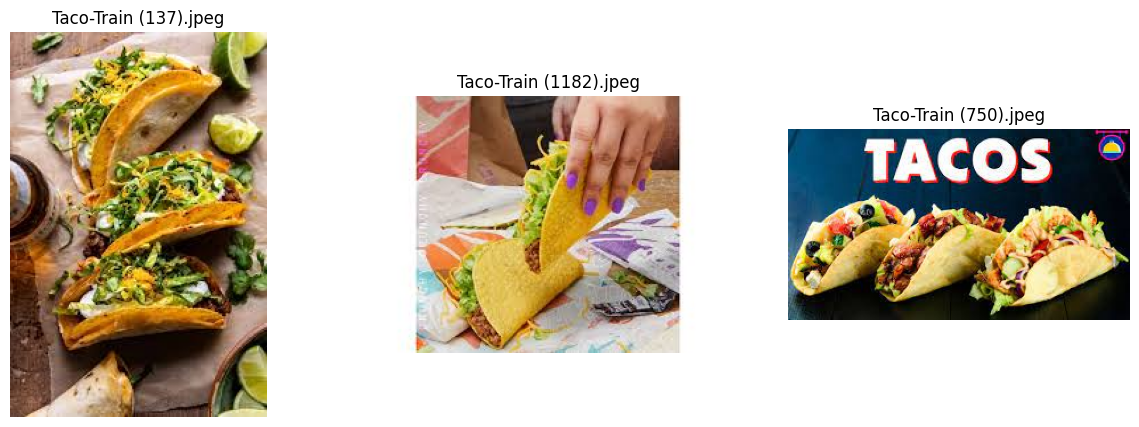

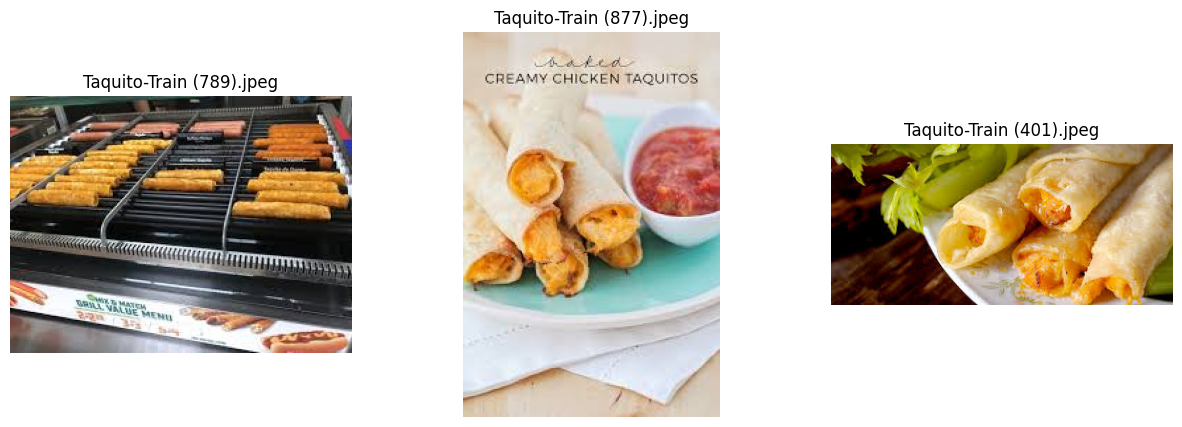

In [5]:
import os

def visualize_random_images(directory_path, num_images=3):
    # Only include supported image files
    image_files = [
        image_file for image_file in os.listdir(directory_path)
        if any(image_file.lower().endswith(ext) for ext in supported_extensions)
    ]

    import random
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    if len(image_files) < num_images:
        print(f"Not enough images in {directory_path} to display {num_images} images.")
        return

    random_image_files = random.sample(image_files, num_images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_file in enumerate(random_image_files):
        image_path = os.path.join(directory_path, image_file)
        try:
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(image_file)
        except Exception as e:
            print(f"Error displaying image {image_file}: {e}")
            axes[i].axis('off')
            axes[i].set_title("Error")
    plt.show()

# List class directories (subfolders) in the training directory
class_directory_paths = [
    d for d in os.listdir(TRAINING_DIR)
    if os.path.isdir(os.path.join(TRAINING_DIR, d))
]

for class_directory_path in class_directory_paths:
    visualize_random_images(os.path.join(TRAINING_DIR, class_directory_path))

# Task 4

1. Choose an appropriate image size for the input images for an image classification task and set the values of the predefined constants `IMAGE_HEIGHT` and `IMAGE_WIDTH`.

2. Load the training, validation and test datasets using the `image_dataset_from_directory` function shown in the Coursera course. Specifically, set appropriate values for `label_mode`, `batch_size`, `image_size` and `shuffle`. Each dataset should get a fixed `seed` of `123`.
Checkout the documentation for details:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

3. Briefly explain for which of the training, validation and test datasets might be important to shuffle the data and why this is important.

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
BATCH_SIZE = 64
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

In [8]:
train_images = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle=True,
    seed=123
)

validation_images = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle=True,
    seed=123
)

test_images = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle=False,
    seed=123
)

Found 14999 files belonging to 10 classes.
Found 3500 files belonging to 10 classes.
Found 1500 files belonging to 10 classes.


**Expected output:**  
Found 14999 images belonging to 10 classes.  
Found 3500 images belonging to 10 classes.  
Found 1500 images belonging to 10 classes.  

# Task 5

In this exercise you will be given a predefined model architecture (except for the data augmentation layers) that you should train using the data with and without the application of data augmentation and compare the results of the different models.

1. Train the model without data augmentation for at least 30 epochs. Save a screenshot of the resulting accuracy and loss plots and judge the quality of the model. Also note the loss and accuracy of the model on the test set.

2. Train the model again, this time using data augmentation for the same number of epochs as the previous model. Choose 2 to 3 data augmentation techniques (other than rescaling) that might be suitable for the given dataset, and briefly explain why. Compare the training and model quality of the two models.

Take a look at this tutorial for an overview of (some) data augmentation techniques:
https://www.tensorflow.org/tutorials/images/data_augmentation

In [9]:
# TODO: Add data augmentation layers
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomCrop(IMAGE_HEIGHT, IMAGE_WIDTH),
    tf.keras.layers.Rescaling(1./255)
])

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.Rescaling(1/255),
    # data_augmentation_layers,
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [11]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=10)

Epoch 1/10


235/235 ━━━━━━━━━━━━━━━━━━━━ 177s 746ms/step - accuracy: 0.1641 - loss: 2.4361 - val_accuracy: 0.2654 - val_loss: 2.0657
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 184s 783ms/step - accuracy: 0.3435 - loss: 1.8978 - val_accuracy: 0.3991 - val_loss: 1.7635
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 175s 743ms/step - accuracy: 0.4995 - loss: 1.4980 - val_accuracy: 0.4403 - val_loss: 1.8288
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 172s 732ms/step - accuracy: 0.6334 - loss: 1.1110 - val_accuracy: 0.4511 - val_loss: 1.9651
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 175s 744ms/step - accuracy: 0.7751 - loss: 0.7124 - val_accuracy: 0.4531 - val_loss: 2.3391
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 173s 736ms/step - accuracy: 0.8695 - loss: 0.4211 - val_accuracy: 0.4251 - val_loss: 3.1258
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 171s 726ms/step - accuracy: 0.9275 - loss: 0.2531 - val_accuracy: 0.4454 - val_loss: 3.4505
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 167s 710ms/step - accuracy: 0.9592 - loss: 0.14

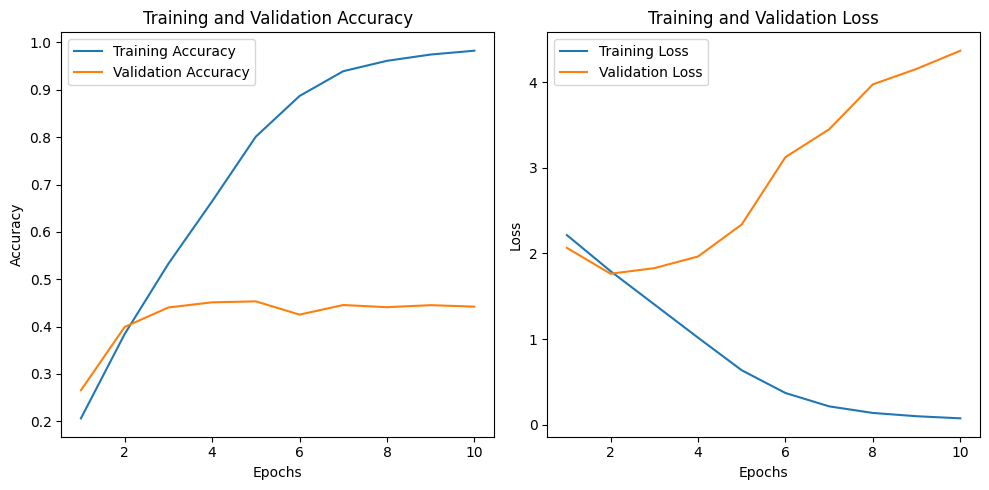

In [12]:
import matplotlib.pyplot as plt

# Plot the model training history
def plot_training_history(history):
    # Extracting accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Setting up the number of epochs for the x-axis
    epochs_range = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [13]:
# Calculate loss and accuracy on the test set
test_loss, test_acc = model.evaluate(test_images)
print(f"Test Accuracy: {test_acc} | Test Loss: {test_loss}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.5260 - loss: 3.4463
Test Accuracy: 0.45533332228660583 | Test Loss: 4.111979007720947
